# DEEE725 Speech Signal Processing Lab
### 2023 Spring, Kyungpook National University 
### Instructor: Gil-Jin Jang

## Lab 02 Draw spectrogram
2023/03/24
source: 

> https://hyunlee103.tistory.com/36

> https://dacon.io/en/competitions/official/235616/codeshare/1277

> https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [5]:
# import necessary pacakages
import matplotlib.pyplot as plt
import sys
import numpy as np
import librosa
import librosa.display
#import matplotlib.pyplot
#from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

In [6]:
# parameters for signal analysis and drawing
#FIG_SIZE = (15,10)
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
#cmap_plot = plt.cm.bone # default colormap for spectrogram, gray
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray
#cmap_plot = plt.cm.plasma 
#cmap_plot = plt.cm.inferno
Fs = 16000

#wavfile = 'kdigits0-2.wav'  # 0.6 - 1.1
wavfile = 'C:/Users/kyeong/Digit-Recognition-GMM-HMM-master/digitrec/segmented/kyeong/4/kdigits7-4.wav'  # 1.0 - 1.5

### load an example windows wav file

In [7]:
# load audio file with Librosa
x, Fs = librosa.load(wavfile, sr = Fs)
print(x,x.shape)

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
print('Fs = %d, Ns = %d, Nf = %d' % (Fs, Ns, Nf))

[-3.0517578e-04 -3.0517578e-04 -3.3569336e-04 ... -2.4414062e-04
 -1.8310547e-04 -3.0517578e-05] (17587,)
Fs = 16000, Ns = 160, Nf = 320


### Waveform 시각화

Text(0.5, 1.0, 'Waveform')

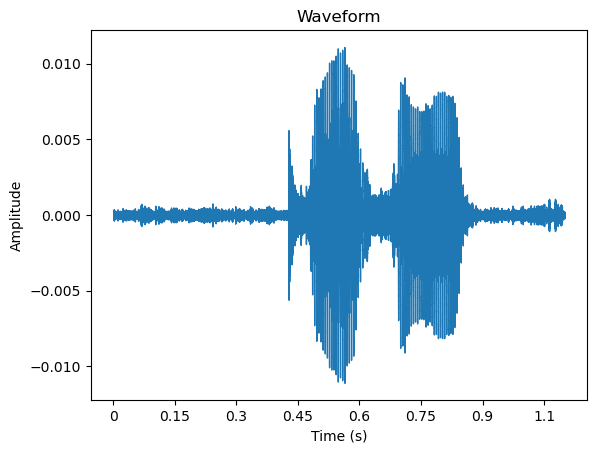

In [8]:
#plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

- 음성 부분만 tight하게 잘라낸다

Text(0.5, 1.0, 'Waveform')

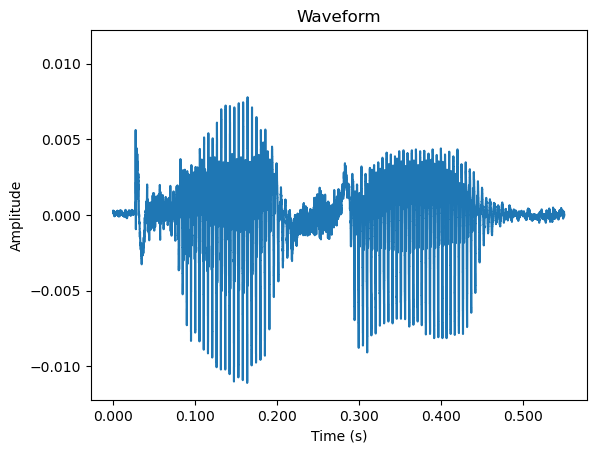

In [9]:
x, Fs = librosa.load(wavfile, sr = Fs)
x = x[int(Fs*0.4):int(Fs*0.95)]

#plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(x, sr=Fs)
# plt.plot(x) works as well
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

### draw spectrogram

Text(0.5, 1.0, 'Spectrogram (dB)')

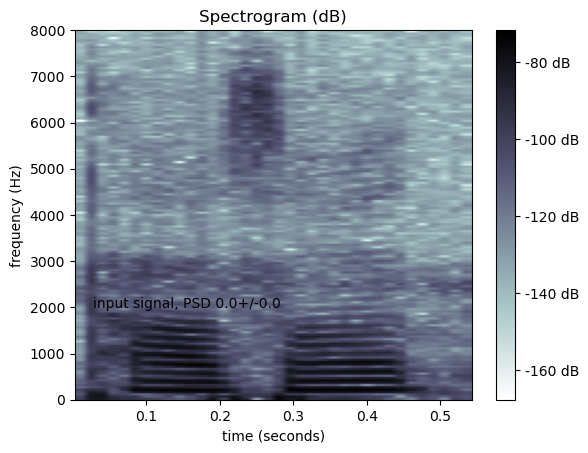

In [10]:
# draw spectrum by matplotlib
[pxx,freq,t,cax] = plt.specgram(x,Fs=Fs,
        window=np.hamming(Ns*2),
        NFFT=Ns*2,noverlap=80,
        scale_by_freq=True,
        mode='psd',scale='dB',
        cmap=cmap_plot)

lab = 'input signal, PSD %.1f+/-%.1f'%(pxx[:].mean(),pxx[:].std())
plt.text(len(x)/Fs*0.05,Fs/8,lab)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

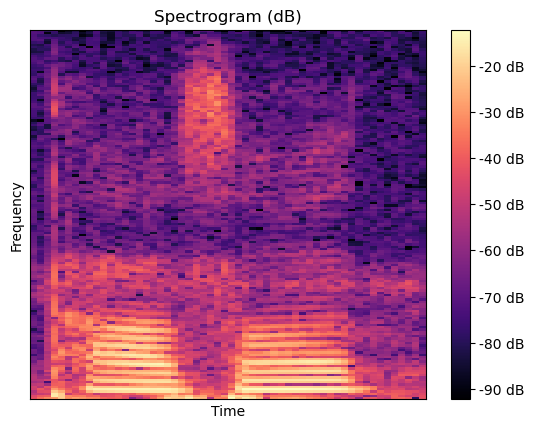

In [11]:
# draw spectrum by librosa
# https://dacon.io/en/competitions/official/235616/codeshare/1277

# STFT -> spectrogram
stft = librosa.stft(x, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs, hop_length=Ns)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

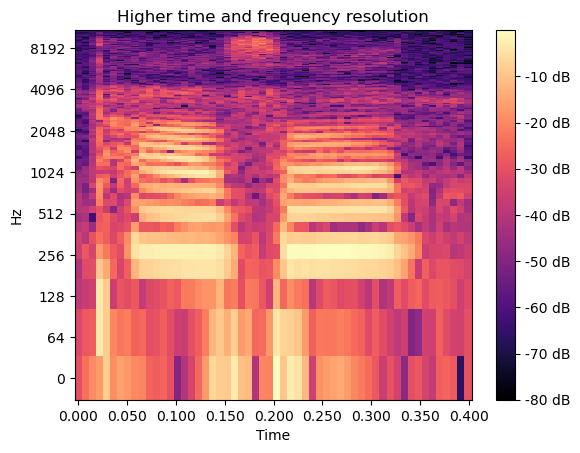

In [12]:
# draw spectrum by librosa, log scale in frequency
# https://librosa.org/doc/main/auto_examples/plot_display.html
fig, ax = plt.subplots()
D_highres = librosa.stft(x, hop_length=Ns, n_fft=Nf)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=Ns, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

(8800,)


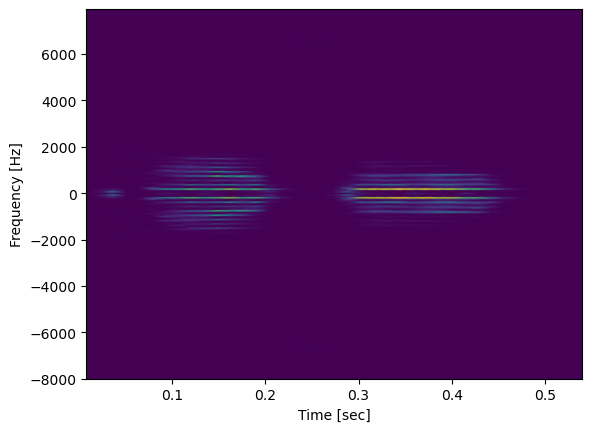

In [13]:
# draw spectrum using scipy - not working
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
print(x.shape)
f, t, Sxx = signal.spectrogram(x, Fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 직접 그려본다

1. 20 ms 간격으로 나눈다

2. FFT 수행 

3. `imshow`로 그린다.

- 한 frame 그려보기 

In [14]:
# 0.2~0.22 부분을 추출한다. 
y = x[int(Fs*0.2):int(Fs*0.22)]

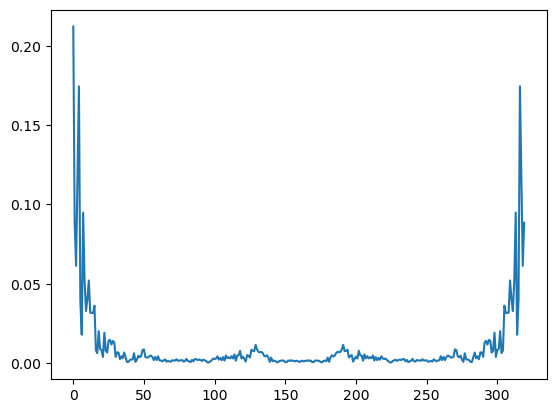

In [15]:
Y = np.abs(np.fft.fft(y))
plt.plot(Y)

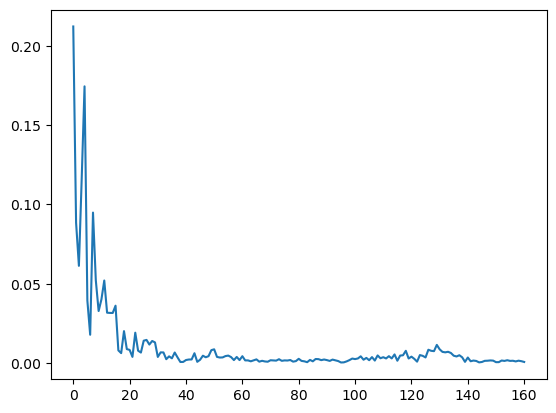

In [16]:
# 0~PI+1 까지의 절대값
Y = np.abs(np.fft.fft(y))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)

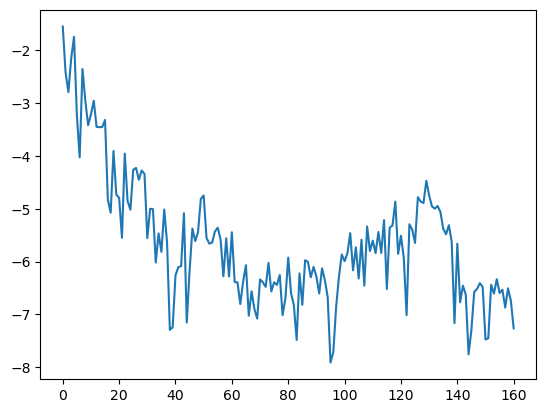

In [17]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
plt.plot(Y)

Text(0, 0.5, 'log magnitude')

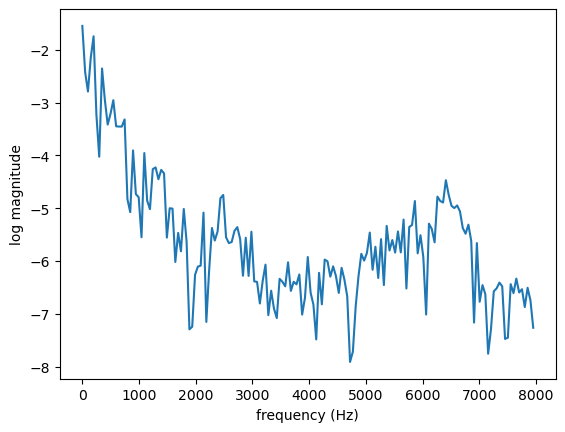

In [18]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(y)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

### Short-time Fourier transform

In [19]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

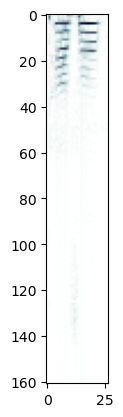

In [20]:
plt.imshow(X, cmap=cmap_plot)

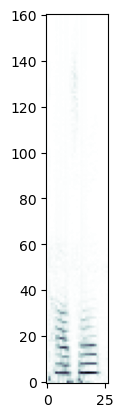

In [21]:
plt.imshow(X, cmap=cmap_plot, origin='lower')

Text(0, 0.5, 'frequency (Hz)')

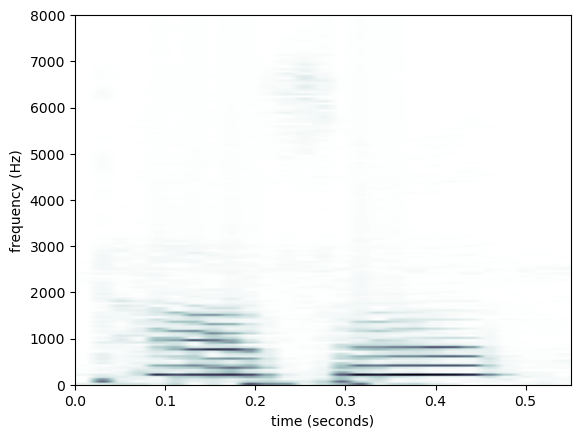

In [22]:
specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

0.48591048202375275 0.028953381658442537


Text(0, 0.5, 'frequency (Hz)')

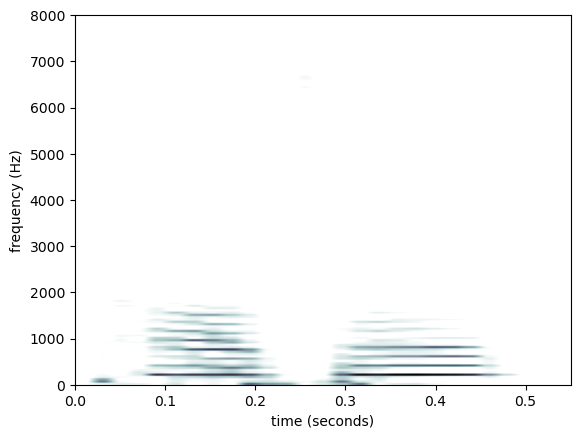

In [23]:
# Short-time Fourier transform
# 20ms 간격으로 나눈다
T = len(x)   # number of samples
num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
for i in range(num_frames):
    y = np.fft.fft(x[(i*Nf):((i+1)*Nf)])
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

### Hamming windows

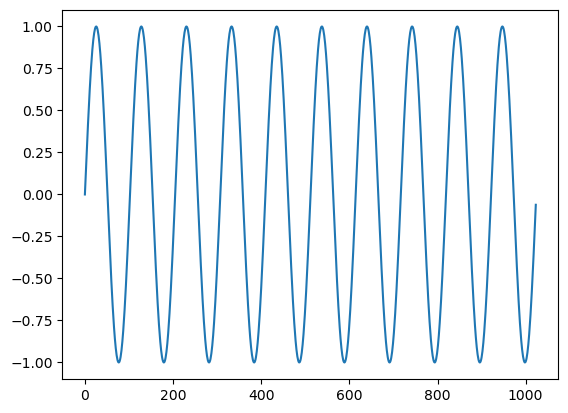

In [24]:
T = 1024
sinusoid = np.sin(np.arange(T)/T*20*np.pi)
plt.plot(sinusoid)

Text(0, 0.5, 'log magnitude')

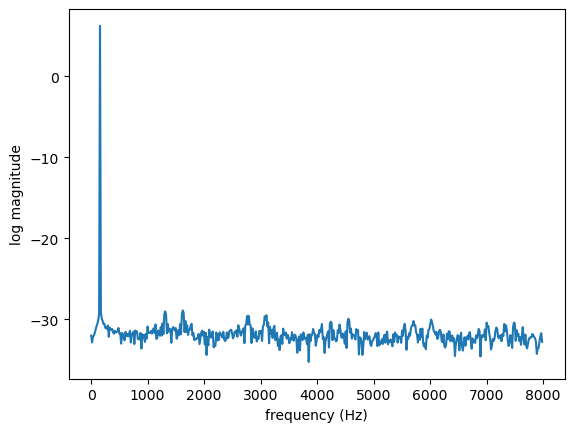

In [25]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

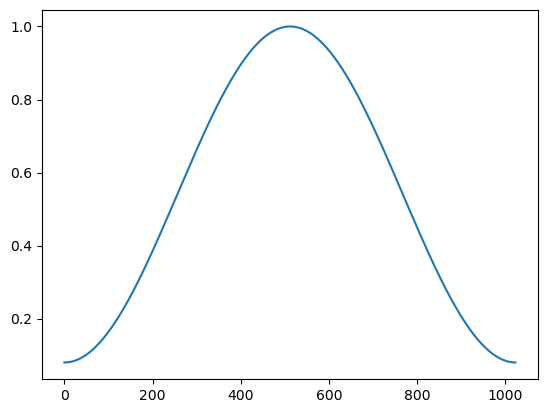

In [26]:
win = librosa.filters.get_window('hamming', T, fftbins=True)
plt.plot(win)

Text(0, 0.5, 'log magnitude')

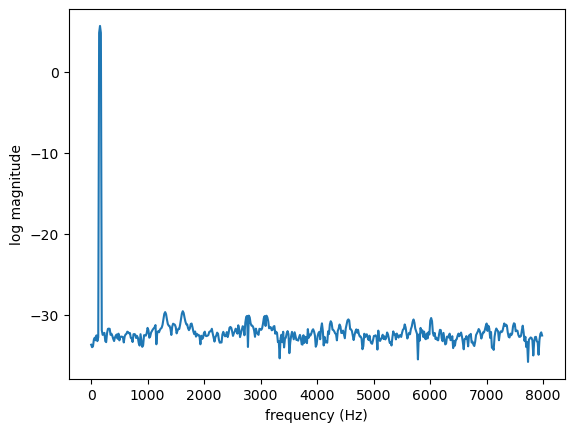

In [27]:
# 0~PI+1 까지의 절대값
# log scale 로
Y = np.log(np.abs(np.fft.fft(win*sinusoid)))
Y = Y[:(len(Y)//2+1)]
xticks=np.arange(len(Y))/len(Y)*Fs/2
plt.plot(xticks, Y)
plt.xlabel('frequency (Hz)')
plt.ylabel('log magnitude')

### STFT에 hamming window 적용 

- 20 ms frame size, 10 ms shift size 적용, rectangular window

0.48591048202375275 0.0286000954902028


Text(0, 0.5, 'frequency (Hz)')

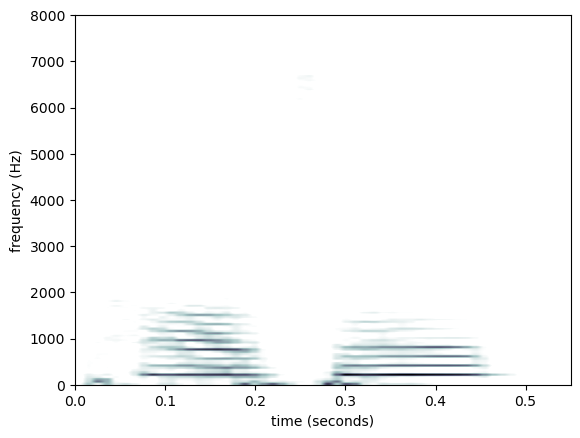

In [28]:
# Short-time Fourier transform
# 10ms 간격, 20ms 분석 
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1 
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

# 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
vmax = np.max(X[:])
vmin = np.percentile(X[:], 91)
print(vmax, vmin)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

- 20 ms frame size, 10 ms shift size 적용, hamming window

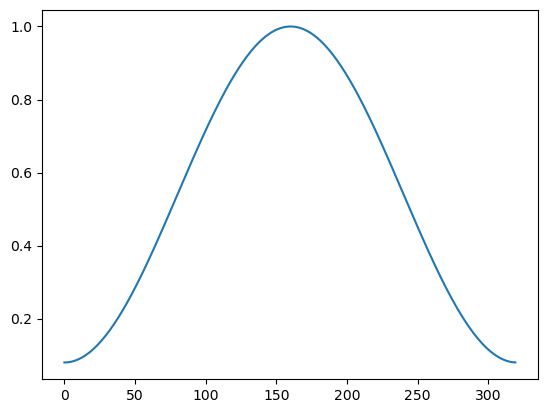

In [29]:
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
plt.plot(win)

(320,)
(161, 54)


Text(0, 0.5, 'frequency (Hz)')

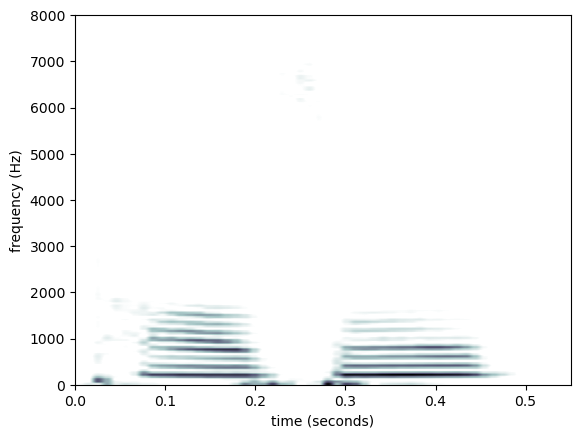

In [30]:
# Short-time Fourier transform
# 10ms 간격, 20ms 분석 
T = len(x)   # number of samples
#num_frames = T//Nf# 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
num_frames = (T-Nf)//Ns + 1 
hNo = Nf//2+1
X = np.zeros((hNo,num_frames))
win = librosa.filters.get_window('hamming', Nf, fftbins=True)
for i in range(num_frames):
    y = x[(i*Ns):(i*Ns+Nf)]
    # hamming window
    y = win*y
    y = np.fft.fft(y)
    y = y[:hNo]
    X[:,i] = np.abs(y)

specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]

# 상위 80%-90% 정도만 scale 한다. 출력 보면서 결정
# FILL with your code

print(win.shape)
print(X.shape)
vmax = np.max(X[:])
vmin = np.percentile(X[:], 90)
specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
plt.imshow(X, cmap=cmap_plot, origin='lower', aspect='auto', extent=specgram_axis, vmax=vmax, vmin=vmin)
plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)')

## Resampling: Decimation, Upsampling, lowpass filter design

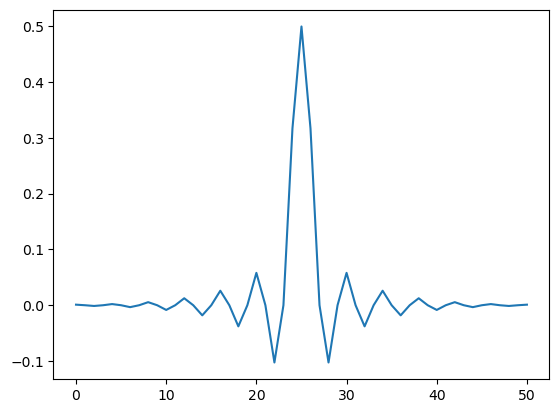

In [31]:
# scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=None)[source]
# FIR filter design using the window method.

a = signal.firwin(51, 0.5, window='hamming')
plt.plot(a)

In [32]:
audio_32k = librosa.resample(x, orig_sr=Fs, target_sr=32000)
print(x.shape)
print(audio_32k.shape)

(8800,)
(17600,)


In [33]:
nyquist = 32000 / 2
cutoff_hz = 8000
order = 101
b = signal.firwin(order, cutoff_hz / nyquist)
audio_32k_filtered = signal.lfilter(b, [1.0], audio_32k)

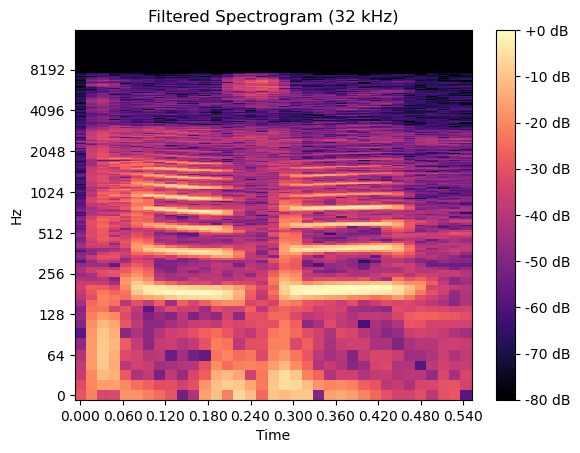

In [34]:
fig, ax = plt.subplots()
D_32k = librosa.stft(audio_32k_filtered, hop_length=512)
S_db_32k = librosa.amplitude_to_db(np.abs(D_32k), ref=np.max)
img = librosa.display.specshow(S_db_32k, sr=32000, hop_length=512, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Filtered Spectrogram (32 kHz)')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [35]:
audio_48k = librosa.resample(x, orig_sr=Fs, target_sr=48000)
print(x.shape)
print(audio_48k.shape)

(8800,)
(26400,)


In [36]:
c = signal.firwin(order, cutoff_hz / nyquist)
audio_48k_filtered = signal.lfilter(c, [1.0], audio_48k)

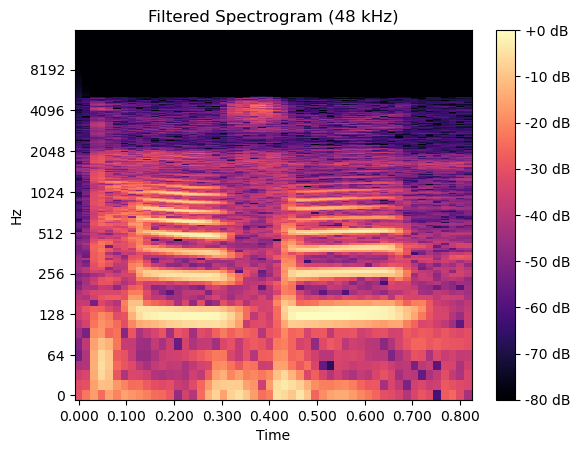

In [37]:
fig, ax = plt.subplots()
D_48k = librosa.stft(audio_48k_filtered, hop_length=512)
S_db_48k = librosa.amplitude_to_db(np.abs(D_48k), ref=np.max)
img = librosa.display.specshow(S_db_48k, sr=32000, hop_length=512, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Filtered Spectrogram (48 kHz)')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [38]:
audio_441k = librosa.resample(x, orig_sr=Fs, target_sr=44100)
print(x.shape)
print(audio_441k.shape)

(8800,)
(24255,)


In [39]:
c = signal.firwin(order, cutoff_hz / nyquist)
audio_441k_filtered = signal.lfilter(c, [1.0], audio_441k)

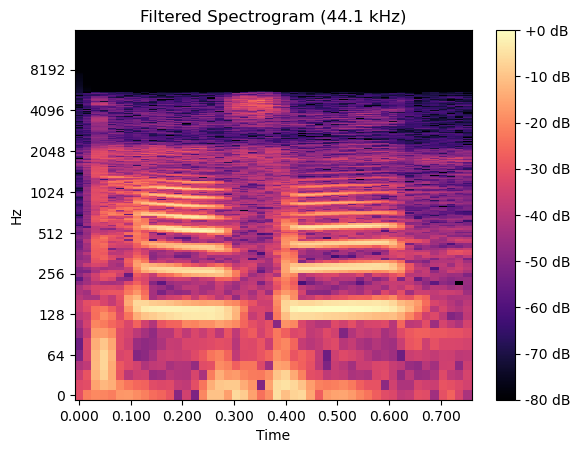

In [40]:
fig, ax = plt.subplots()
D_441k = librosa.stft(audio_441k_filtered, hop_length=512)
S_db_441k = librosa.amplitude_to_db(np.abs(D_441k), ref=np.max)
img = librosa.display.specshow(S_db_441k, sr=32000, hop_length=512, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Filtered Spectrogram (44.1 kHz)')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [45]:
import soundfile as sf

sf.write('xxx_32k.wav', audio_32k_filtered, 32000)
sf.write('xxx_48k.wav', audio_48k_filtered, 48000)
sf.write('xxx_44k.wav', audio_441k_filtered, 44100)

In [52]:
audio_32k, sr_32k = librosa.load('xxx_32k.wav', sr=32000)
audio_8k = librosa.resample(audio_32k,orig_sr=32000, target_sr=8000)
sf.write('xxx_8k.wav', audio_8k, 8000)

audio_48k, sr_48k = librosa.load('xxx_48k.wav', sr=48000)
audio_8k = librosa.resample(audio_48k,orig_sr=48000, target_sr=8000)
sf.write('xxx_8k.wav', audio_8k, 8000)

audio_441k, sr_441k = librosa.load('xxx_44k.wav', sr=44100)
audio_8k = librosa.resample(audio_441k, orig_sr=44100, target_sr=8000)
sf.write('xxx_8k.wav', audio_8k, 8000)

# Resample to 11.025 kHz
audio_32k, sr_32k = librosa.load('xxx_32k.wav', sr=32000)
audio_11k = librosa.resample(audio_32k, orig_sr=32000, target_sr=11025)
sf.write('xxx_11k.wav', audio_11k, 11025)

audio_48k, sr_48k = librosa.load('xxx_48k.wav', sr=48000)
audio_11k = librosa.resample(audio_48k, orig_sr=48000, target_sr=11025)
sf.write('xxx_11k.wav', audio_11k, 11025)

audio_44k, sr_44k = librosa.load('xxx_44k.wav', sr=44100)
audio_11k = librosa.resample(audio_44k, orig_sr=44100, target_sr=11025)
sf.write('xxx_11k.wav', audio_11k, 11025)

## End of Lab 02